In [2]:
import numpy as np

N = 100
mean = 0
variance = 1
shift_scale1 = {1:[0,1],2:[0,100],3:[10,1], 4:[10,100]}
colors = {1:'r',2:'b',3:'y', 4:'m'}
X = np.random.normal(mean,variance,N)  
shift_scale2 = {1:[1,1],2:[1,100],3:[10,1],4:[10,100]}

1:
Оценка максимального правдоподобия для данного распределения:

$ \hat{\theta} = \overline X$

Сопряжённое априорное распределение с известной дисперсией $σ^2$:

$N(\mu_0,\, \sigma_0^2)$

Параметры апостериорного распределения:

$\left.\left(\frac{\mu_0}{\sigma_0^2} + \frac{\sum_{i=1}^n x_i}{\sigma^2}\right)\right/\left(\frac{1}{\sigma_0^2} + \frac{n}{\sigma^2}\right),\, \left(\frac{1}{\sigma_0^2} + \frac{n}{\sigma^2}\right)^{-1}$

2:
Оценка максимального правдоподобия для данного распределения:

$\hat{\theta} = \dfrac{1}{n} \sum\limits_{i=1}^n (X_i-\overline X)^2=S^2$

Сопряжённое априорное распределение с известным средним μ:


Scaled inverse chi-square:  $\mbox{Scale-inv-}\chi^2(\nu_0, \sigma_0^2)$

Параметры апостериорного распределения:

$\nu+n,\, \frac{\nu\sigma_0^2 + \sum_{i=1}^n (x_i-\mu)^2}{\nu+n}\!$

In [4]:
def bayes_estimation(num, X, params):
    pmean,pvar = params
    if (num == 1):
        return (pmean/pvar + np.sum(X)/variance)/(1/pvar + len(X)/variance)
    else:
        nu = len(X) + pmean
        tau2 = (pmean * pvar + np.sum([(x - mean) ** 2 for x in X]))/nu
        if nu > 2:
            return (nu * tau2)/(nu - 2)
        else:
            return 0



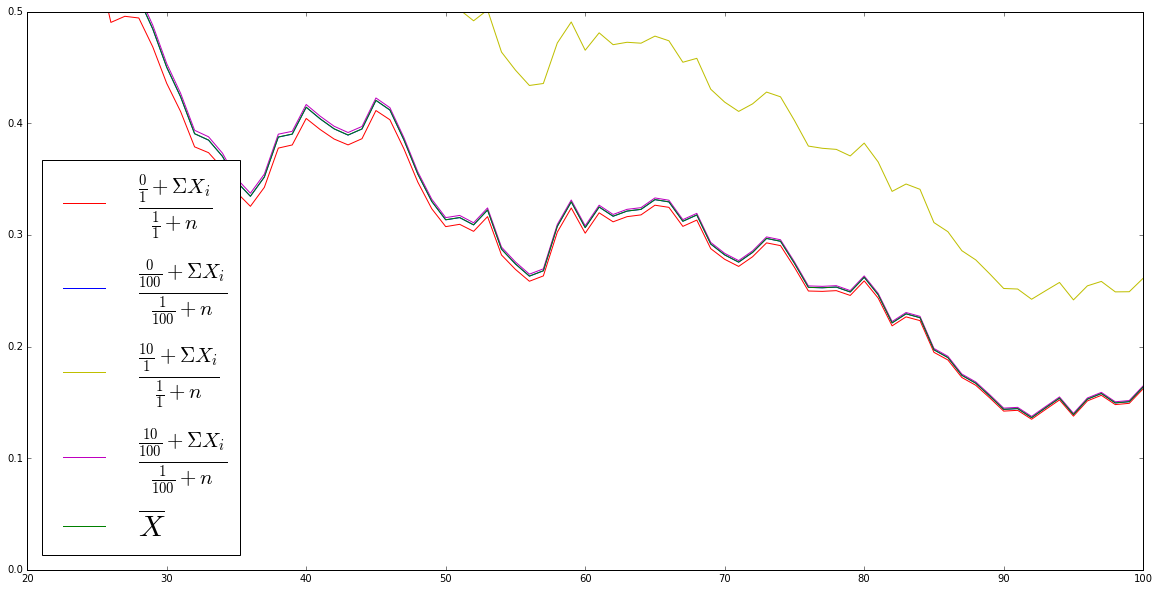

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

def label1(params):
    pmean,pvar = params
    return r'$\frac{\frac{' + str(pmean) + r'}{' + str(pvar) + r'}+\Sigma X_i}{\frac{1}{' + str(pvar) + r'}+n}$'

A_X = np.arange(1,N+1)
plt.figure(figsize=(20, 10))
for i in range(1,5):
    param = shift_scale1[i]
    B = [bayes_estimation(1,X[0:k+1],param) for k in range(len(X))]
    plt.plot(A_X,np.abs(np.add((B),-mean)),colors[i],label=label1(param))

M= [np.mean(X[0:k+1]) for k in range(N)]    
plt.plot(A_X,np.abs(np.add(M,-mean)), color='g', label=r'$\overline{X}$')
plt.legend(loc='lower left', prop={'size':30})

plt.xlim(20, 100)
plt.ylim(0, 0.5)
plt.show()

Из графика видно, что в первом случае лучшая оценка при априорном распределении $N(0,1)$

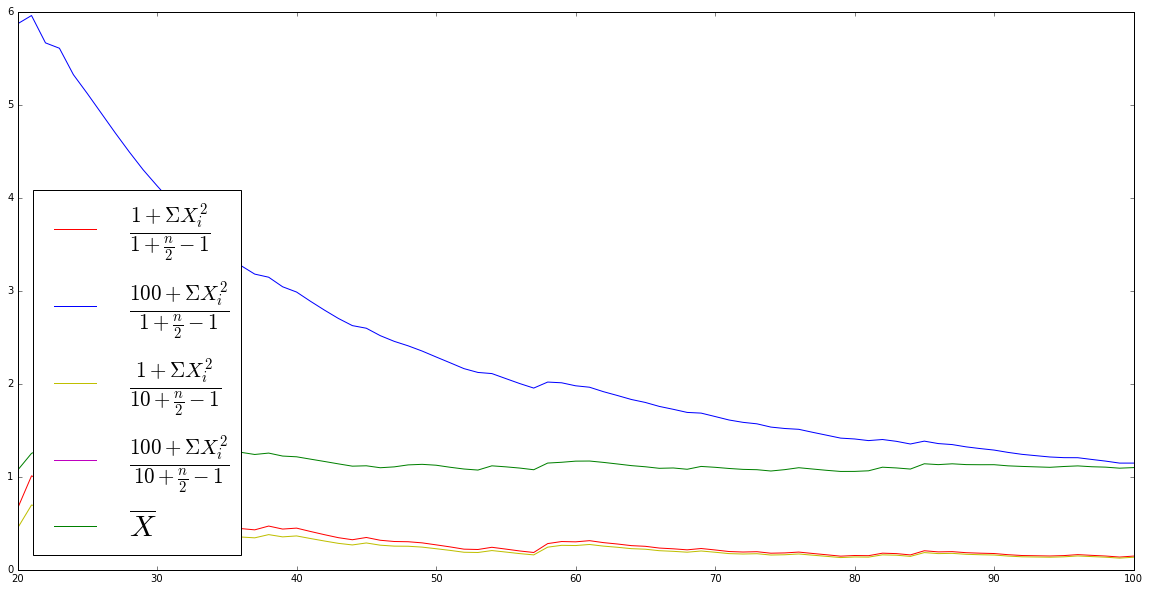

In [10]:
def label2(params):
    pmean,pvar = params
    return r'$\frac{' + str(pvar) + r'+\Sigma X_i^2}{' + str(pmean) + r'+\frac{n}{2} - 1}$'
A_X = np.arange(1,N+1)
plt.figure(figsize=(20, 10))
for i in range(1,5):
    param = shift_scale2[i]
    B = [bayes_estimation(2,X[0:k+1],param) for k in range(len(X))]
    plt.plot(A_X,np.abs(np.add((B),-variance)),colors[i],label=label2(param))

M= [np.var(X[0:k+1]) for k in range(N)]    
plt.plot(A_X,np.abs(np.add(M,-mean)), color='g', label=r'$\overline{X}$')
plt.legend(loc='lower left', prop={'size':30})

plt.xlim(20, 100)
plt.ylim(0, 6)
plt.show()

Из графика видно, что во втором случае лучшая оценка при априорном распределении  $Inv-Gamma(1, 10)$.